# Tutorial: Classification II: evaluation & tuning

This worksheet covers the [Classification II: evaluation & tuning](https://datasciencebook.ca/classification2.html) chapter of the online textbook, which also lists the learning objectives for this worksheet. You should read the textbook chapter before attempting this worksheet. 

## Handwritten Digit Classification using R

<img src="https://media.giphy.com/media/UwrdbvJz1CNck/giphy.gif" width = "600"/>

Source: https://media.giphy.com/media/UwrdbvJz1CNck/giphy.gif

MNIST is a computer vision dataset that consists of images of handwritten digits like these:

![](img/MNIST.png)

It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.


In this tutorial, we’re going to train a classifier to look at images and predict what digits they are. Our goal isn’t to train a really elaborate model that achieves state-of-the-art performance, but rather to dip a toe into using classification with pixelated images. As such, we’re going to keep working with the simple K-nearest neighbour classifier we have been exploring in the last two weeks.



### Using image data for classification

As mentioned earlier, every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. Both the training set and test set contain images and their corresponding labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big matrix of numbers:

<img src="img/MNIST-Matrix.png" width = "500"/>


We can flatten this matrix into a vector of 28x28 = 784 numbers and give it a class label (here 1 for the number one). It doesn’t matter how we flatten the array, as long as we’re consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure.

<img src="img/matrix_to_row.png" width = "1000"/>


We do this for every image of the digits we have, and we create a data table like the one shown below that we can use for classification. Note, like any other classification problem that we have seen before, we need many observations for each class. This problem is also a bit different from the first classification problem we have encountered (Wisonsin breast cancer data set), in that we have more than two classes (here we have 10 classes, one for each digit from 0 to 9).

<img src="img/data_table.png" width = "700"/>

This information is taken from: https://tensorflow.rstudio.com/tensorflow/articles/tutorial_mnist_beginners.html

In [87]:
###
### Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
source("cleanup.R")

# functions needed to work with images
# code below sourced from: https://gist.github.com/daviddalpiaz/ae62ae5ccd0bada4b9acd6dbc9008706
# helper function for visualization
show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0  # avoid dark pixel in top left
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

**Question 1.0** Multiple Choice:
<br> {points: 1}

How many rows and columns does the array of an image have?

A. 784 columns and 1 row

B. 28 columns and 1 row

C. 18 columns and 18 rows

D. 28 columns and 28 rows 

*Assign your answer to an object called `answer1.0`. Make sure the correct answer is an uppercase letter and to surround your answer with quotation marks (e.g. `"F"`).*

In [88]:
# Replace the fail() with your answer. 

# your code here
answer1.0<-"D"# No Answer - remove if you provide an answer

In [89]:
library(digest)
stopifnot("type of answer1.0 is not character"= setequal(digest(paste(toString(class(answer1.0)), "a9994")), "abdb0a633d257ab6c513339f51f435e7"))
stopifnot("length of answer1.0 is not correct"= setequal(digest(paste(toString(length(answer1.0)), "a9994")), "9f10f62042bbe5dd3b65c9688fbe5726"))
stopifnot("value of answer1.0 is not correct"= setequal(digest(paste(toString(tolower(answer1.0)), "a9994")), "ac831492029fd6308eddea85090d78b1"))
stopifnot("letters in string value of answer1.0 are correct but case is not correct"= setequal(digest(paste(toString(answer1.0), "a9994")), "912d860d9c293946a61382c1912b85eb"))

print('Success!')

[1] "Success!"


**Question 1.1** Multiple Choice: 
<br> {points: 1}

Once we linearize the array, how many rows represent a number?

A. 28

B. 784

C. 1

D. 18

*Assign your answer to an object called `answer1.1`. Make sure the correct answer is an uppercase letter and to surround your answer with quotation marks (e.g. `"F"`).*

In [90]:
# Replace the fail() with your answer. 

answer1.1<-"C" # No Answer - remove if you provide an answer

In [91]:
library(digest)
stopifnot("type of answer1.1 is not character"= setequal(digest(paste(toString(class(answer1.1)), "bacc")), "d9c65aa0c2ae376af5c72f049e62e39d"))
stopifnot("length of answer1.1 is not correct"= setequal(digest(paste(toString(length(answer1.1)), "bacc")), "46db0350582115642d744df832d04308"))
stopifnot("value of answer1.1 is not correct"= setequal(digest(paste(toString(tolower(answer1.1)), "bacc")), "320a5c1751f93ac7c6f197b17299e9cc"))
stopifnot("letters in string value of answer1.1 are correct but case is not correct"= setequal(digest(paste(toString(answer1.1), "bacc")), "65dbcf5aa2b223588bc0c59961b86bdb"))

print('Success!')

[1] "Success!"


## 2. Exploring the Data

Before we move on to do the modeling component, it is always required that we take a look at our data and understand the problem and the structure of the data well. We can start this part by loading the images and taking a look at the first rows of the dataset. You can load the data set by running the cell below. 

In [92]:
# Load images. 
# Run this cell. 
training_data <- read_csv('data/mnist_train_small.csv')
testing_data  <- read_csv('data/mnist_test_small.csv')

Rows: 600 Columns: 785
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (785): X, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 600 Columns: 785
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (785): X, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Look at the first 6 rows of `training_data`. What do you notice?

In [93]:
slice(training_data, 1:6)
dim(training_data)

X,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 600 785

There are no class labels! This data set has already been split into the X's (which you loaded above) and the labels. In addition, there is an extra "X" column which represents the row number (1, 2, 3...). **Keep this in mind for now because we will remove it later on.** Now, let's load the labels.

In [94]:
# Run this cell. 
training_labels <- read_csv('data/mnist_train_label_small.csv')['y'] |> mutate(y = as_factor(y))
testing_labels  <- read_csv('data/mnist_test_label_small.csv')['y'] |> mutate(y = as_factor(y))

Rows: 600 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): X, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 600 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): X, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Look at the first 6 labels of `training_labels` using the `slice(data_frame, 1:6)` function. 

In [95]:
# Run this cell.
slice(training_labels, 1:6)

y
<fct>
5
0
4
1
9
2


**Question 2.0**
<br> {points: 1}

How many rows does the training data set have? Use `nrow()`.

*Assign your answer to an object called `number_of_rows`. Make sure your answer is a numeric and so it should not be surrounded by quotation marks.*

In [96]:
# Replace the fail() with your answer. 

# your code here
number_of_rows<-nrow(training_labels)# No Answer - remove if you provide an answer
number_of_rows

[1] 600

In [97]:
library(digest)
stopifnot("type of number_of_rows is not integer"= setequal(digest(paste(toString(class(number_of_rows)), "263bd")), "1eff13c779d605e1c270828a8ab5cca1"))
stopifnot("length of number_of_rows is not correct"= setequal(digest(paste(toString(length(number_of_rows)), "263bd")), "107cb28bbaa2f60c73db1020b3291ded"))
stopifnot("values of number_of_rows are not correct"= setequal(digest(paste(toString(sort(number_of_rows)), "263bd")), "da228813b78e945409d93acc9e791f9e"))

print('Success!')

[1] "Success!"


**Question 2.1**
<br> {points: 1}

For mutli-class classification with k-nn it is important for the classes to have about the same number of observations in each class. For example, if  90% of our training set observationas were labeled as 2's, then k-nn classification predict 2 almost every time and we would get an accuracy score of 90% even though our classifier wasn't really doing a great job. 

Use the `group_by` and `summarize` function to get the counts for each digit in the `training_labels` dataframe, and see if the data set is balanced across the classes (has roughly equal numbers of observation for each class). Name the output `counts`. `counts` should be a data frame with 2 columns, `y` and `count` (the column `count` should have the counts for how many observations there were for each class group).

In [98]:
# Replace the fail() with your answer. 

# your code here
counts <- training_labels|>
  group_by(y) |>
  summarize(count = n()) # No Answer - remove if you provide an answer
counts

y,count
<fct>,<int>
0,58
1,69
2,64
3,59
4,59
5,56
6,54
7,62
8,54


In [99]:
library(digest)
stopifnot("counts should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(counts)), "a835c")), "d7b64de956b2f4cbb4da9348db6a7133"))
stopifnot("dimensions of counts are not correct"= setequal(digest(paste(toString(dim(counts)), "a835c")), "9f07dac76c9bd4f62bf5ead2e4d3ba84"))
stopifnot("column names of counts are not correct"= setequal(digest(paste(toString(sort(colnames(counts))), "a835c")), "4e31d53e3e18dbecf7901693dc9f2e7f"))
stopifnot("types of columns in counts are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(counts, class)))), "a835c")), "fa1f27ef318621653db18fbcd8461885"))
stopifnot("values in one or more numerical columns in counts are not correct"= setequal(digest(paste(toString(if (any(sapply(counts, is.numeric))) sort(round(sapply(counts[, sapply(counts, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "a835c")), "64bf575458e4af08cbee66d06c164ee6"))
stopifnot("values in one or more character columns in counts are not correct"= setequal(digest(paste(toString(if (any(sapply(counts, is.character))) sum(sapply(counts[sapply(counts, is.character)], function(x) length(unique(x)))) else 0), "a835c")), "256a54bce3154a1353fde2f0e2a68c59"))
stopifnot("values in one or more factor columns in counts are not correct"= setequal(digest(paste(toString(if (any(sapply(counts, is.factor))) sum(sapply(counts[, sapply(counts, is.factor)], function(col) length(unique(col)))) else 0), "a835c")), "0dea4f085db27dfdd48539a479326eb5"))

print('Success!')

[1] "Success!"


**Question 2.2** True or False:
<br> {points: 1}

The classes are roughly balanced. Some of them are just a bit larger or smaller than others. 

*Assign your answer to an object called `answer2.2`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`)*

In [100]:
# Replace the fail() with your answer. 

# your code here
answer2.2<-"true" # No Answer - remove if you provide an answer

In [101]:
library(digest)
stopifnot("type of answer2.2 is not character"= setequal(digest(paste(toString(class(answer2.2)), "6f24c")), "0d2245845029bf5a226d6f50756a368d"))
stopifnot("length of answer2.2 is not correct"= setequal(digest(paste(toString(length(answer2.2)), "6f24c")), "b9ca111973f00e4e5746ee05916fd160"))
stopifnot("value of answer2.2 is not correct"= setequal(digest(paste(toString(tolower(answer2.2)), "6f24c")), "5604ee8807f216487ac950dd7dbeefc5"))
stopifnot("letters in string value of answer2.2 are correct but case is not correct"= setequal(digest(paste(toString(answer2.2), "6f24c")), "5604ee8807f216487ac950dd7dbeefc5"))

print('Success!')

[1] "Success!"


To view an image in the notebook, you can use the `show_digit` function (we gave you the code for this function in the first code cell in the notebook, All you have to do to use it is run the cell below). The `show_digit` function takes the row from the dataset whose image you want to produce, which you can obtain using the `slice` function.

The code we provide below will show you the image for the observation in the 200th row from the training data set. 

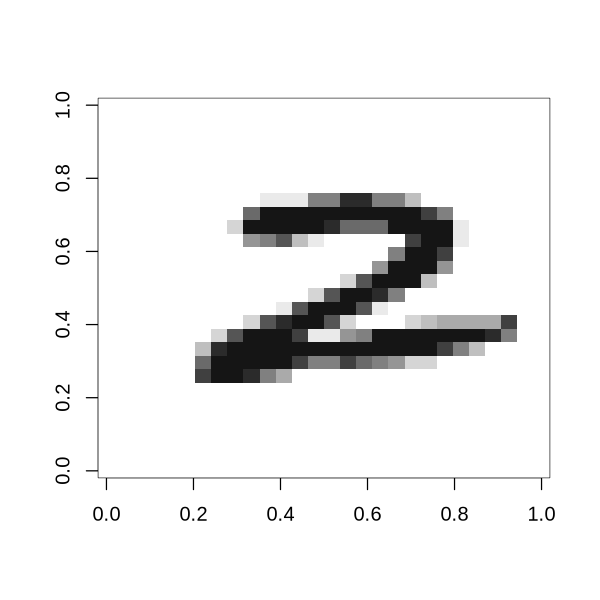

In [102]:
# Run this cell to get the images for the 200th row from the training data set.
options(repr.plot.height = 5, repr.plot.width = 5)
show_digit(slice(training_data, 200))

**Question 2.3** 
<br> {points: 3}

Show the image for row 102.

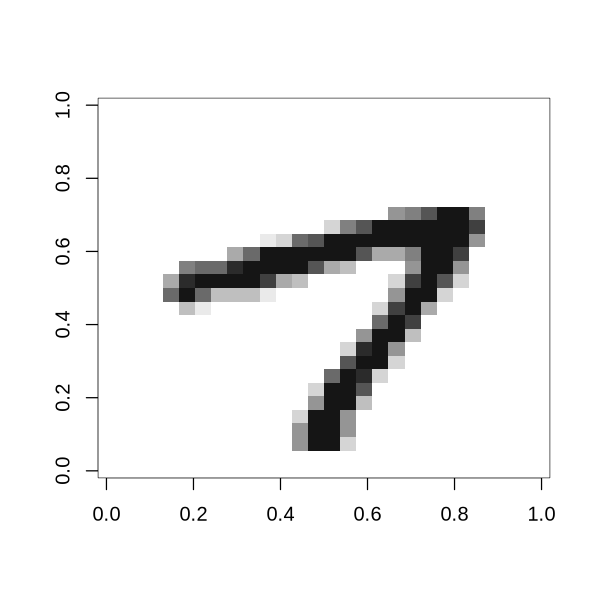

In [103]:
options(repr.plot.height = 5, repr.plot.width = 5)

# Replace the fail() with your answer. 
options(repr.plot.height = 5, repr.plot.width = 5)
show_digit(slice(training_data, 102))
# your code here
 # No Answer - remove if you provide an answer

If you are unsure as to what number the plot is depicting (because the handwriting is messy) you can use `slice` to get the label from the `training_labels`:

In [104]:
# run this cell to get the training label for the 200th row
training_labels |> 
    slice(200)

y
<fct>
2


**Question 2.4** 
<br> {points: 1}

What is the class label for row 102? Your answer should be a data frame with one column (named `y`) and one row.

*Assign your answer to an object called `label_102`.*

In [113]:
# Replace the fail() with your answer. 

label_102 <- data.frame(y = factor(7))
label_102


y
<fct>
7


In [114]:
library(digest)
stopifnot("label_102 should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(label_102)), "ce07")), "911b902d2c8f9cfee1519f8a2a483ed3"))
stopifnot("dimensions of label_102 are not correct"= setequal(digest(paste(toString(dim(label_102)), "ce07")), "3587d0888aeebad9afc1e26129af5b86"))
stopifnot("column names of label_102 are not correct"= setequal(digest(paste(toString(sort(colnames(label_102))), "ce07")), "5854a700c6c8dad347a661ef73941491"))
stopifnot("types of columns in label_102 are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(label_102, class)))), "ce07")), "cc665119c8b6e3895dad4ee9f4a3ac9d"))
stopifnot("values in one or more numerical columns in label_102 are not correct"= setequal(digest(paste(toString(if (any(sapply(label_102, is.numeric))) sort(round(sapply(label_102[, sapply(label_102, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "ce07")), "b7873983a0a6153711b08fc7aab8aaff"))
stopifnot("values in one or more character columns in label_102 are not correct"= setequal(digest(paste(toString(if (any(sapply(label_102, is.character))) sum(sapply(label_102[sapply(label_102, is.character)], function(x) length(unique(x)))) else 0), "ce07")), "b7873983a0a6153711b08fc7aab8aaff"))
stopifnot("values in one or more factor columns in label_102 are not correct"= setequal(digest(paste(toString(if (any(sapply(label_102, is.factor))) sum(sapply(label_102[, sapply(label_102, is.factor)], function(col) length(unique(col)))) else 0), "ce07")), "aba2eb9472e33dda4c2ab73b160d6d43"))

print('Success!')

[1] "Success!"


## 3. Splitting the Data

**Question 3.0**
<br> {points: 1}

Currently, the image data and labels are split. The `tidymodels` package needs the image data and labels to be combined together in one data frame. Given that the image data and labels are in the same order, we can use the `bind_cols` function to combine them. Name the training image data with its respective labels `training_set` and name the testing image data with its respective labels `testing_set`. 

> Note: even though the entire data set has been split for you already into a training and a test set, don't forget to do this in the future for other data sets where this is not the case. Remember, you need to have a training and testing data set when designing a useful k-nn classification model. 

Also, remember in Section 2 that we told you to keep something in mind? To remind you, there is an extra "X" column on the far left which represents the row numbers (1, 2, 3, etc.) in the `training_set`. **This column should not be used for training.** Therefore, let's remove this column from the data set. 

*Hint: You can remove columns in a dataset using the `select` function and by putting a negative sign infront of the column you want to exclude (e.g. `-X`)*.

In [ ]:
# Set the seed. Don't remove this!
set.seed(9999) 

training_set<- bind_cols(training_labels, training_data) |> # for the training data
        select(-X)

testing_set<- bind_cols(testing_labels, testing_data) # for the testing data


# your code here

# No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("training_set should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(training_set)), "77352")), "30b40780d79e09d070d47c85c06f4ae3"))
stopifnot("dimensions of training_set are not correct"= setequal(digest(paste(toString(dim(training_set)), "77352")), "9b28bb00adebd170dc4fe9ff2eccc75f"))
stopifnot("column names of training_set are not correct"= setequal(digest(paste(toString(sort(colnames(training_set))), "77352")), "31fc57c51beafde22f14bb2113a41587"))
stopifnot("types of columns in training_set are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(training_set, class)))), "77352")), "6b244da539faa3772b7b3bbcdca06e8a"))
stopifnot("values in one or more numerical columns in training_set are not correct"= setequal(digest(paste(toString(if (any(sapply(training_set, is.numeric))) sort(round(sapply(training_set[, sapply(training_set, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "77352")), "47ef444f9815f67421ac9f07e64e09bc"))
stopifnot("values in one or more character columns in training_set are not correct"= setequal(digest(paste(toString(if (any(sapply(training_set, is.character))) sum(sapply(training_set[sapply(training_set, is.character)], function(x) length(unique(x)))) else 0), "77352")), "a7cbc433e52889504facf08516462951"))
stopifnot("values in one or more factor columns in training_set are not correct"= setequal(digest(paste(toString(if (any(sapply(training_set, is.factor))) sum(sapply(training_set[, sapply(training_set, is.factor)], function(col) length(unique(col)))) else 0), "77352")), "651384436c2713f10472a0b33ea752b1"))

stopifnot("testing_set should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(testing_set)), "77353")), "b587f781074400970da0a1b9a9e4133c"))
stopifnot("dimensions of testing_set are not correct"= setequal(digest(paste(toString(dim(testing_set)), "77353")), "f14a7428e410f254212646117dbe5a80"))
stopifnot("column names of testing_set are not correct"= setequal(digest(paste(toString(sort(colnames(testing_set))), "77353")), "aba660b72056bb8654db4a3b29275841"))
stopifnot("types of columns in testing_set are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(testing_set, class)))), "77353")), "5b3b64785ba7250ea65961a8c6564343"))
stopifnot("values in one or more numerical columns in testing_set are not correct"= setequal(digest(paste(toString(if (any(sapply(testing_set, is.numeric))) sort(round(sapply(testing_set[, sapply(testing_set, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "77353")), "8d262003560342ca2a105fbffd558a15"))
stopifnot("values in one or more character columns in testing_set are not correct"= setequal(digest(paste(toString(if (any(sapply(testing_set, is.character))) sum(sapply(testing_set[sapply(testing_set, is.character)], function(x) length(unique(x)))) else 0), "77353")), "55f79afcd10741cfa7a63d81d6b662eb"))
stopifnot("values in one or more factor columns in testing_set are not correct"= setequal(digest(paste(toString(if (any(sapply(testing_set, is.factor))) sum(sapply(testing_set[, sapply(testing_set, is.factor)], function(col) length(unique(col)))) else 0), "77353")), "3e3d9627ed585640d864d74ceb586574"))

print('Success!')

**Question 3.1**
<br> {points: 3}

We have already split the data into two datasets, one for training purposes and one for testing purposes. **Is it important to split the data into a training and testing dataset when designing a knn classification model?** If yes, why do we do this? If no, explain why this is not a good idea.

Yes. The training set is used to train the model on the data pattern, while testing set is used to test the model on new data to see if the trained model is accurate. This is to ensure that the model works on unknown data. 

## Which $k$ should we use?

As you learned from the worksheet, we can use cross-validation on the training data set to select which $k$ is the most optimal for our data set for k-nn classification. 

**Question 3.2**
<br> {points: 1}

To get all the marks in this question, you will have to:
- Create a recipe that uses all predictors and a model specification with tuning on the number of neighbours (**Note: You don't need to scale or center this data**)
- Perform a 5-fold cross-validation on the training set
- Create a workflow analysis with your recipe and model specification. Try **k = 2, 3, 4, 5, and 6**.
    - (we would normally try more values of $k$ across a wider range; but this process puts a lot of load on our course server, so we keep it limited here.)
- Collect the metrics from the workflow analysis 
- Plot the accuracy vs $k$
    - Assign this plot to an object called `cross_val_plot`

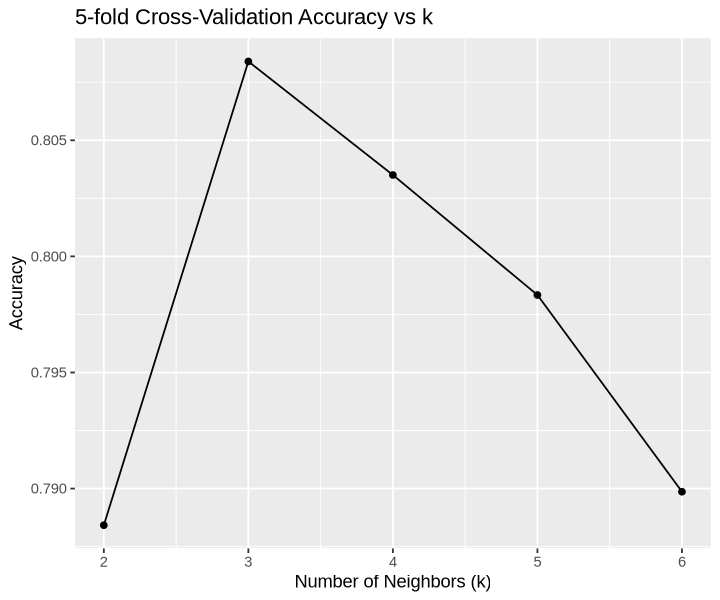

In [139]:
# Set the seed. Don't remove this!
set.seed(1234) 

options(repr.plot.height = 5, repr.plot.width = 6)
library(tidymodels)
library(ggplot2)

recipe <- recipe(y ~ ., data = training_set)

knn_spec <- nearest_neighbor(neighbors = tune(), weight_func = "rectangular", dist_power = 2) |>
  set_mode("classification") |>
  set_engine("kknn")

k_folds <- vfold_cv(training_set, v = 5,strata=y)

k_vals <- tibble(neighbors = seq(from = 2, to = 6, by = 1))
                 
knn_workflow<- workflow()|>
  add_recipe(recipe)|>
  add_model(knn_spec)|>
  tune_grid(resamples = k_folds,grid = k_vals)|>
    collect_metrics()
          
filtered_results<- filter(knn_workflow,.metric=="accuracy")
                 
cross_val_plot <- filtered_results |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Neighbors (k)", y = "Accuracy", title = "5-fold Cross-Validation Accuracy vs k")

cross_val_plot

# No Answer - remove if you provide an answer

In [140]:
library(digest)
stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(cross_val_plot$layers)), function(i) {c(class(cross_val_plot$layers[[i]]$geom))[1]})), "9b32a")), "d22ff5676ca324395ce650f5620ab149"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(cross_val_plot$layers)), function(i) {rlang::get_expr(c(cross_val_plot$layers[[i]]$mapping, cross_val_plot$mapping)$x)}), as.character))), "9b32a")), "4cf56bde0cd6ea12f8fd41ac6b9c8b3f"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(cross_val_plot$layers)), function(i) {rlang::get_expr(c(cross_val_plot$layers[[i]]$mapping, cross_val_plot$mapping)$y)}), as.character))), "9b32a")), "13e4dc62f4af142f3f55968b58b2a3b2"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cross_val_plot$layers[[1]]$mapping, cross_val_plot$mapping)$x)!= cross_val_plot$labels$x), "9b32a")), "23da1c642256d5ed7db32bb1bf170ad6"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cross_val_plot$layers[[1]]$mapping, cross_val_plot$mapping)$y)!= cross_val_plot$labels$y), "9b32a")), "23da1c642256d5ed7db32bb1bf170ad6"))
stopifnot("incorrect colour variable in cross_val_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(cross_val_plot$layers[[1]]$mapping, cross_val_plot$mapping)$colour)), "9b32a")), "f70d134338fb3cdf2c3347b810481e28"))
stopifnot("incorrect shape variable in cross_val_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(cross_val_plot$layers[[1]]$mapping, cross_val_plot$mapping)$shape)), "9b32a")), "f70d134338fb3cdf2c3347b810481e28"))
stopifnot("the colour label in cross_val_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cross_val_plot$layers[[1]]$mapping, cross_val_plot$mapping)$colour) != cross_val_plot$labels$colour), "9b32a")), "f70d134338fb3cdf2c3347b810481e28"))
stopifnot("the shape label in cross_val_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cross_val_plot$layers[[1]]$mapping, cross_val_plot$mapping)$colour) != cross_val_plot$labels$shape), "9b32a")), "f70d134338fb3cdf2c3347b810481e28"))
stopifnot("fill variable in cross_val_plot is not correct"= setequal(digest(paste(toString(quo_name(cross_val_plot$mapping$fill)), "9b32a")), "94924d09c0cbff53dab6a696d5c26dae"))
stopifnot("fill label in cross_val_plot is not informative"= setequal(digest(paste(toString((quo_name(cross_val_plot$mapping$fill) != cross_val_plot$labels$fill)), "9b32a")), "f70d134338fb3cdf2c3347b810481e28"))
stopifnot("position argument in cross_val_plot is not correct"= setequal(digest(paste(toString(class(cross_val_plot$layers[[1]]$position)[1]), "9b32a")), "8ec700b9c9dec7bef2f9e03606e8743d"))

stopifnot("cross_val_plot$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(cross_val_plot$data)), "9b32b")), "a09632b2ab435c7952310194ccbae915"))
stopifnot("dimensions of cross_val_plot$data are not correct"= setequal(digest(paste(toString(dim(cross_val_plot$data)), "9b32b")), "6e6da220566f92527219af96f4d8e906"))
stopifnot("column names of cross_val_plot$data are not correct"= setequal(digest(paste(toString(sort(colnames(cross_val_plot$data))), "9b32b")), "61f65a150e0a5287821ba043238f219d"))
stopifnot("types of columns in cross_val_plot$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(cross_val_plot$data, class)))), "9b32b")), "bdc2234b2063fb403ff39757d90f40e1"))
stopifnot("values in one or more numerical columns in cross_val_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(cross_val_plot$data, is.numeric))) sort(round(sapply(cross_val_plot$data[, sapply(cross_val_plot$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "9b32b")), "a770e4ac42c923c7929b8b805241d453"))
stopifnot("values in one or more character columns in cross_val_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(cross_val_plot$data, is.character))) sum(sapply(cross_val_plot$data[sapply(cross_val_plot$data, is.character)], function(x) length(unique(x)))) else 0), "9b32b")), "ea8a23b492232e9dde6fcb85a7f7e07e"))
stopifnot("values in one or more factor columns in cross_val_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(cross_val_plot$data, is.factor))) sum(sapply(cross_val_plot$data[, sapply(cross_val_plot$data, is.factor)], function(col) length(unique(col)))) else 0), "9b32b")), "bb5a3af09212cd278b1f2cee9eb519d3"))

print('Success!')

[1] "Success!"


**Question 3.3**
<br> {points: 3}

Based on the plot from **Question 3.2**, which $k$ would you choose and how can you be sure about your decision? In your answer you should reference why we do cross-validation.

3. It has the highest accuracy after using cross validation.  Cross-validation tests how well a model generalizes to unseen data through splitting up data to train a model, then test it. according to the results, K=3 gives the best accuracy meaning it gives the most correct number of predictions.

## 4. Let's build our model

**Question 4.0**
<br> {points: 3}

Now that we have explored our data, separated the data into training and testing sets (was technically done for you), and applied cross-validation to choose the best $k$, we can build our final model.

First, build your model specification with the best value for $K$. Assign your answer to an object called `mnist_spec`.

Then, pass the model specification and the training data set to the `fit()` function. Assign your answer to an object called `mnist_fit`.

In [120]:
# Set the seed. Don't remove this!
set.seed(9999) 

library(tidymodels)


mnist_spec <- nearest_neighbor(neighbors = 3, weight_func = "rectangular",dist_power = 2) |>
  set_mode("classification") |>
  set_engine("kknn")

mnist_fit <- fit(mnist_spec,y ~ .,data = training_set)
# your code here
 # No Answer - remove if you provide an answer

In [121]:
library(digest)
stopifnot("type of exists('mnist_spec') is not logical"= setequal(digest(paste(toString(class(exists('mnist_spec'))), "97bc5")), "0aedca3df678c2c21765cd93a2649fd8"))
stopifnot("logical value of exists('mnist_spec') is not correct"= setequal(digest(paste(toString(exists('mnist_spec')), "97bc5")), "25e913218b337968eff03c38ab3e81e2"))

stopifnot("type of exists('mnist_fit') is not logical"= setequal(digest(paste(toString(class(exists('mnist_fit'))), "97bc6")), "ada858e60261df100a2b7dd2c3edf20b"))
stopifnot("logical value of exists('mnist_fit') is not correct"= setequal(digest(paste(toString(exists('mnist_fit')), "97bc6")), "61a634ce64ed512d1b17eb5d129d6c91"))

# The rest of the tests are intentionally hidden so that you can practice deciding 
# when you have found the correct answer. 
print('Success!')

[1] "Success!"


**Question 4.1**
<br> {points: 1}

Use your final model to predict on the test dataset and assign this to an object called `mnist_predictions`. Report the accuracy of this prediction, and store this in an object named `mnist_metrics`. Also report the confusion matrix and and store this in an object named `mnist_conf_mat`. 

In [130]:
# Set the seed. Don't remove this!
set.seed(9999) 

mnist_predictions <- predict(mnist_fit, new_data = testing_set) |>
bind_cols(testing_set)

mnist_metrics <- mnist_predictions |>
metrics(truth = y, estimate = .pred_class) |>
filter(.metric == "accuracy")

mnist_conf_mat <- mnist_predictions |>
conf_mat(truth = y, estimate = .pred_class)

mnist_conf_mat
# your code here
# No Answer - remove if you provide an answer

          Truth
Prediction  0  1  2  3  4  5  6  7  8  9
         0 51  0  1  0  0  1  2  0  3  0
         1  0 71 11  2  2  1  1  2  3  0
         2  0  0 34  4  1  0  3  2  3  0
         3  1  0  3 49  1  7  0  2  1  2
         4  0  0  1  0 46  2  3  0  2  5
         5  0  0  0  4  1 36  0  0  3  0
         6  0  0  2  0  2  1 41  0  1  0
         7  0  0  8  2  2  1  0 32  0  5
         8  1  2  4  1  0  6  2  1 32  0
         9  0  0  0  0 12  1  0 18  4 52

In [131]:
library(digest)
stopifnot("mnist_predictions should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(mnist_predictions)), "a9977")), "6c19676b2d3df220d30738ac49381cec"))
stopifnot("dimensions of mnist_predictions are not correct"= setequal(digest(paste(toString(dim(mnist_predictions)), "a9977")), "7bf8bf186516e28f0b225b359c4f4c7c"))
stopifnot("column names of mnist_predictions are not correct"= setequal(digest(paste(toString(sort(colnames(mnist_predictions))), "a9977")), "d847b82f88aa0094627cc662fe08b9ac"))
stopifnot("types of columns in mnist_predictions are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(mnist_predictions, class)))), "a9977")), "62c195694d4eb2893544157cb1729854"))
stopifnot("values in one or more numerical columns in mnist_predictions are not correct"= setequal(digest(paste(toString(if (any(sapply(mnist_predictions, is.numeric))) sort(round(sapply(mnist_predictions[, sapply(mnist_predictions, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "a9977")), "c5dda8aa3db9570f5e5f81db2f6dfd2f"))
stopifnot("values in one or more character columns in mnist_predictions are not correct"= setequal(digest(paste(toString(if (any(sapply(mnist_predictions, is.character))) sum(sapply(mnist_predictions[sapply(mnist_predictions, is.character)], function(x) length(unique(x)))) else 0), "a9977")), "0055527ef7bdee9e13ee0b1c5986623d"))
stopifnot("values in one or more factor columns in mnist_predictions are not correct"= setequal(digest(paste(toString(if (any(sapply(mnist_predictions, is.factor))) sum(sapply(mnist_predictions[, sapply(mnist_predictions, is.factor)], function(col) length(unique(col)))) else 0), "a9977")), "24304d3256d0c0fca305625d7415f55b"))

stopifnot("type of class(mnist_conf_mat) is not character"= setequal(digest(paste(toString(class(class(mnist_conf_mat))), "a9978")), "7f3aca9784c29b3a63a3271bf0803598"))
stopifnot("length of class(mnist_conf_mat) is not correct"= setequal(digest(paste(toString(length(class(mnist_conf_mat))), "a9978")), "9d4bca7570d784357a8b383a363dfe30"))
stopifnot("value of class(mnist_conf_mat) is not correct"= setequal(digest(paste(toString(tolower(class(mnist_conf_mat))), "a9978")), "b1209ad3b28f8c99c0a7a36807ac2484"))
stopifnot("letters in string value of class(mnist_conf_mat) are correct but case is not correct"= setequal(digest(paste(toString(class(mnist_conf_mat)), "a9978")), "b1209ad3b28f8c99c0a7a36807ac2484"))

stopifnot("as.data.frame.matrix(mnist_conf_mat$table) should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(as.data.frame.matrix(mnist_conf_mat$table))), "a9979")), "75b8b30e2dc1eaeae9a58c7ae894f24f"))
stopifnot("dimensions of as.data.frame.matrix(mnist_conf_mat$table) are not correct"= setequal(digest(paste(toString(dim(as.data.frame.matrix(mnist_conf_mat$table))), "a9979")), "d9c657dc4ca0e62e93f7b9e152617051"))
stopifnot("column names of as.data.frame.matrix(mnist_conf_mat$table) are not correct"= setequal(digest(paste(toString(sort(colnames(as.data.frame.matrix(mnist_conf_mat$table)))), "a9979")), "514346f8b4c48cbc7c4715265653a299"))
stopifnot("types of columns in as.data.frame.matrix(mnist_conf_mat$table) are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(as.data.frame.matrix(mnist_conf_mat$table), class)))), "a9979")), "fc01c63a8d0af56621ab14fc191f5b35"))
stopifnot("values in one or more numerical columns in as.data.frame.matrix(mnist_conf_mat$table) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame.matrix(mnist_conf_mat$table), is.numeric))) sort(round(sapply(as.data.frame.matrix(mnist_conf_mat$table)[, sapply(as.data.frame.matrix(mnist_conf_mat$table), is.numeric)], sum, na.rm = TRUE), 2)) else 0), "a9979")), "7a3c042eaa6bc7c00dab93273c8c6fa8"))
stopifnot("values in one or more character columns in as.data.frame.matrix(mnist_conf_mat$table) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame.matrix(mnist_conf_mat$table), is.character))) sum(sapply(as.data.frame.matrix(mnist_conf_mat$table)[sapply(as.data.frame.matrix(mnist_conf_mat$table), is.character)], function(x) length(unique(x)))) else 0), "a9979")), "31a33fb137ebae74ab0ece216e468928"))
stopifnot("values in one or more factor columns in as.data.frame.matrix(mnist_conf_mat$table) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame.matrix(mnist_conf_mat$table), is.factor))) sum(sapply(as.data.frame.matrix(mnist_conf_mat$table)[, sapply(as.data.frame.matrix(mnist_conf_mat$table), is.factor)], function(col) length(unique(col)))) else 0), "a9979")), "31a33fb137ebae74ab0ece216e468928"))

stopifnot("type of 'data.frame' %in% class(mnist_metrics) is not logical"= setequal(digest(paste(toString(class('data.frame' %in% class(mnist_metrics))), "a997a")), "f10a792cc5d364bbd2cb82d1881ab97f"))
stopifnot("logical value of 'data.frame' %in% class(mnist_metrics) is not correct"= setequal(digest(paste(toString('data.frame' %in% class(mnist_metrics)), "a997a")), "b15a095232e23ab5b78e4d78d1c4c47b"))

stopifnot("type of sort(colnames(mnist_metrics)) is not character"= setequal(digest(paste(toString(class(sort(colnames(mnist_metrics)))), "a997b")), "2dadebab0aa38cc8e2438599c51d5a06"))
stopifnot("length of sort(colnames(mnist_metrics)) is not correct"= setequal(digest(paste(toString(length(sort(colnames(mnist_metrics)))), "a997b")), "917cde4182c4f7ad1b1fc130b6f8eccf"))
stopifnot("value of sort(colnames(mnist_metrics)) is not correct"= setequal(digest(paste(toString(tolower(sort(colnames(mnist_metrics)))), "a997b")), "1883f630963d366d06858f591449f704"))
stopifnot("letters in string value of sort(colnames(mnist_metrics)) are correct but case is not correct"= setequal(digest(paste(toString(sort(colnames(mnist_metrics))), "a997b")), "1883f630963d366d06858f591449f704"))

stopifnot("type of round(mnist_metrics |> filter(.metric == \"accuracy\") |> pull(.estimate), 2) is not numeric"= setequal(digest(paste(toString(class(round(mnist_metrics |> filter(.metric == "accuracy") |> pull(.estimate), 2))), "a997c")), "ee6de8229c3c6eeace47974a93e22cd5"))
stopifnot("value of round(mnist_metrics |> filter(.metric == \"accuracy\") |> pull(.estimate), 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(mnist_metrics |> filter(.metric == "accuracy") |> pull(.estimate), 2), 2)), "a997c")), "cecac775121c28641b783d4867dfe634"))
stopifnot("length of round(mnist_metrics |> filter(.metric == \"accuracy\") |> pull(.estimate), 2) is not correct"= setequal(digest(paste(toString(length(round(mnist_metrics |> filter(.metric == "accuracy") |> pull(.estimate), 2))), "a997c")), "7dd2597a1723e5020bfd5afd73317f41"))
stopifnot("values of round(mnist_metrics |> filter(.metric == \"accuracy\") |> pull(.estimate), 2) are not correct"= setequal(digest(paste(toString(sort(round(round(mnist_metrics |> filter(.metric == "accuracy") |> pull(.estimate), 2), 2))), "a997c")), "cecac775121c28641b783d4867dfe634"))

print('Success!')

[1] "Success!"


**Question 4.2**
<br> {points: 3}

For this exercise, print out 3 images and the true labels from the test set that were predicted correctly. 

To approach this exercise, we will first create a data frame that contains the predictions, and the labels from the testing set. We will want to use this data to find cases where the hand written digits were predicted correctly (i.e., any rows where the values in the predicted class label column, `.pred_class`, match the test set labels, `y`). We will then want to use this information to go back to the original data and extract images that correspond to these correct predictions. 

To keep track of which rows correspond to which images, we will use `mutate` to add a column called `seq`. This will order the rows, from 1 to $n$ (where $n$ is the number of images in the test set), and be useful to keep track of which rows correspond to which images when we do something to the data frame, for example, filter it to find correctly predicted labels. Scaffolding has been provided below for you. Assign your answer to an object called `mnist_predictions_with_labels`. Make sure this object has only three columns `.pred_class`, `y`, and `seq` 

From this data frame, filter for cases of equality between the predictions, `.pred_class`, and testing set labels, `y`. Essentially, you want to find cases where the predictions match the testing set labels. Sample 3 rows of data using `slice_sample`. Assign your answer to an object called `matching`. 

Next, we want to extract the row numbers (`seq`) from the `matching` data frame to input them into the `show_digit` function. The scaffolding to extract the data from the first row and the associated row number is provided below. Assign your answers respectively to `matching_1`, `matching_2`, and `matching_3`. 

*Use `show_digit` to visualize the digits indexed by `matching_1`, `matching_2`, and `matching_3` to see what they look like!*

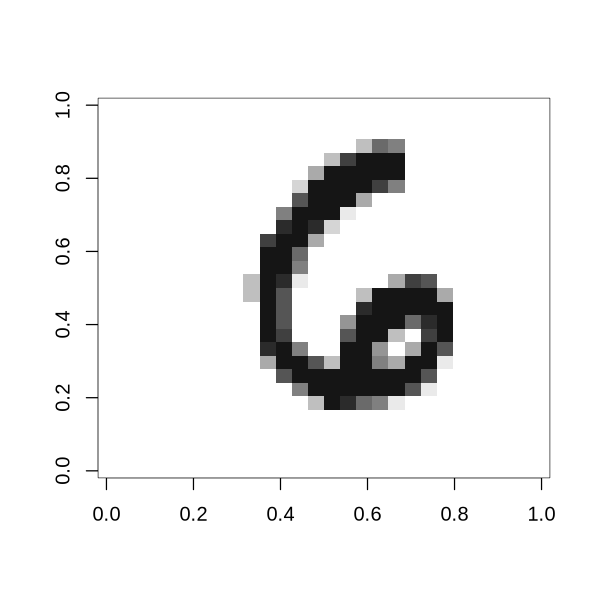

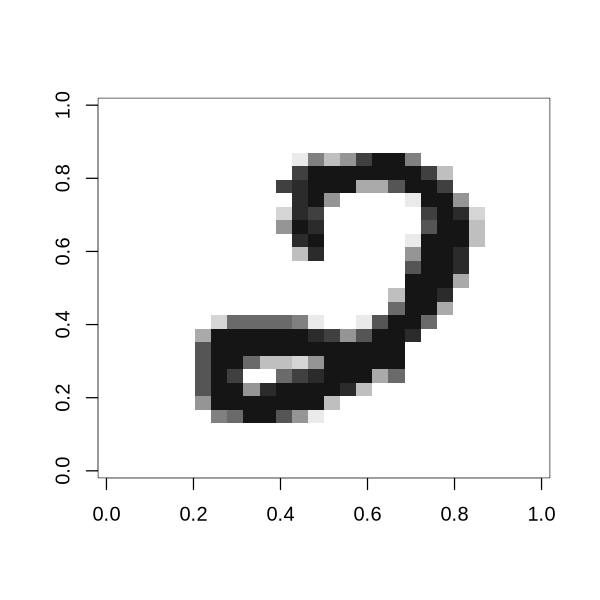

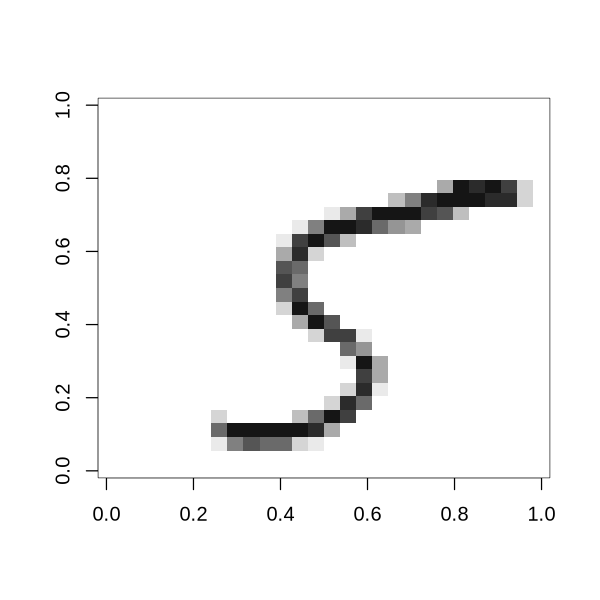

In [143]:
# Set the seed. Don't remove this!
set.seed(1000) 

mnist_predictions_with_labels <- mnist_predictions |>
       select(.pred_class) |>
       bind_cols(testing_set |> select(y)) |>
       mutate(seq = 1:nrow(testing_set)) |>
       as.data.frame()

matching <- mnist_predictions_with_labels |>
          filter(.pred_class == y) |>
          slice_sample(n = 3) 

matching_1 <- matching |>
          slice(1) |>
          select(seq) |>
          pull() 

matching_2 <- matching |>
          slice(2) |>
          select(seq) |>
          pull()

matching_3 <- matching |>
          slice(3) |>
          select(seq) |>
          pull()

 show_digit(slice(testing_data, matching_1))
 show_digit(slice(testing_data, matching_2))
 show_digit(slice(testing_data, matching_3))

options(repr.plot.height = 5, repr.plot.width = 5)
options(repr.plot.height = 5, repr.plot.width = 5)

# your code here
 # No Answer - remove if you provide an answer

In [144]:
library(digest)
stopifnot("type of exists('mnist_predictions_with_labels') is not logical"= setequal(digest(paste(toString(class(exists('mnist_predictions_with_labels'))), "25db0")), "1f8b0640454e444eae8a65a4e9b67410"))
stopifnot("logical value of exists('mnist_predictions_with_labels') is not correct"= setequal(digest(paste(toString(exists('mnist_predictions_with_labels')), "25db0")), "9434d00d5a10e43cf27dee9f94f37eaa"))

stopifnot("type of dim(mnist_predictions_with_labels) is not integer"= setequal(digest(paste(toString(class(dim(mnist_predictions_with_labels))), "25db1")), "cb3db593b2d80dc74d643a0d108293e8"))
stopifnot("length of dim(mnist_predictions_with_labels) is not correct"= setequal(digest(paste(toString(length(dim(mnist_predictions_with_labels))), "25db1")), "544ad314d3dc995432ba2b3a212e3965"))
stopifnot("values of dim(mnist_predictions_with_labels) are not correct"= setequal(digest(paste(toString(sort(dim(mnist_predictions_with_labels))), "25db1")), "849f92579e49a1963878271f1c70066f"))

stopifnot("type of exists('matching') is not logical"= setequal(digest(paste(toString(class(exists('matching'))), "25db2")), "55342b100b06c89c9e25a6ddae729238"))
stopifnot("logical value of exists('matching') is not correct"= setequal(digest(paste(toString(exists('matching')), "25db2")), "a31503cad1837db222ca844360eb8bee"))

stopifnot("type of exists('matching_1') is not logical"= setequal(digest(paste(toString(class(exists('matching_1'))), "25db3")), "244c0977d8449837896863e0e7c712f6"))
stopifnot("logical value of exists('matching_1') is not correct"= setequal(digest(paste(toString(exists('matching_1')), "25db3")), "894c9bb93168708d90ea5e23999a8548"))

stopifnot("type of exists('matching_2') is not logical"= setequal(digest(paste(toString(class(exists('matching_2'))), "25db4")), "56ff839900e82be42fcbba68b788f470"))
stopifnot("logical value of exists('matching_2') is not correct"= setequal(digest(paste(toString(exists('matching_2')), "25db4")), "ddf42317c886d5fbac94c2aff778a9d0"))

stopifnot("type of exists('matching_3') is not logical"= setequal(digest(paste(toString(class(exists('matching_3'))), "25db5")), "41621dd98031c2929420727c0a996d78"))
stopifnot("logical value of exists('matching_3') is not correct"= setequal(digest(paste(toString(exists('matching_3')), "25db5")), "cb4b471dda4f7679ce24754f3cbb8261"))

# The rest of the tests are intentionally hidden so that you can practice deciding 
# when you have found the correct answer. 
print('Success!')

[1] "Success!"


**Question 4.3**
<br> {points: 3}

Print out 3 images and true labels from the test set that were **NOT** predicted correctly. You can reuse the `mnist_predictions_with_labels` data frame from **Question 4.2**. 

Filter for inequality between the predictions and the labels for the testing set in a data frame called `not_matching`. Afterwards, extract the row number and assign them to `not_matching_1`, `not_matching_2`, and `not_matching_3` respectively. If you need help, refer to the instructions in **Question 4.2**. 

Similar to the previous question, use the `show_digit` function we gave you above to print out the images.

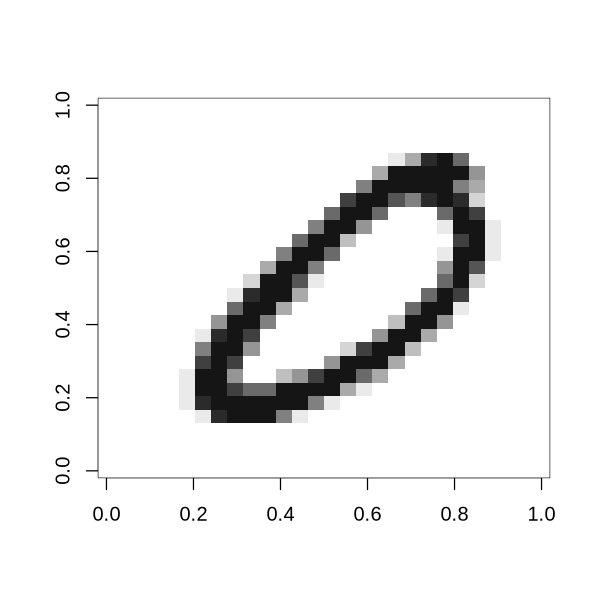

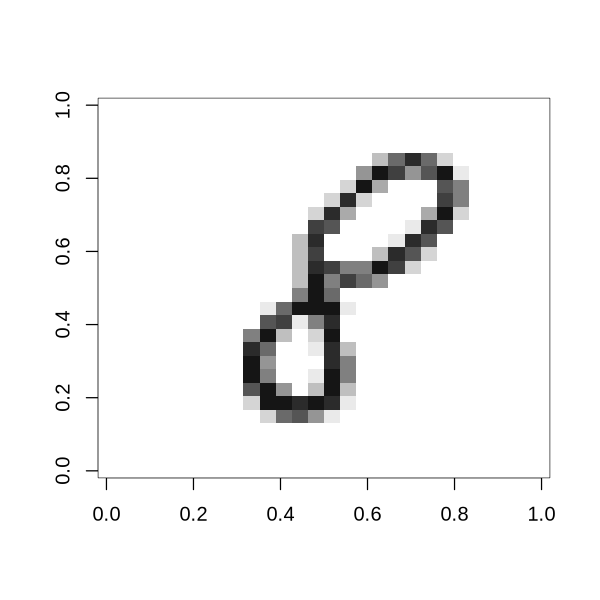

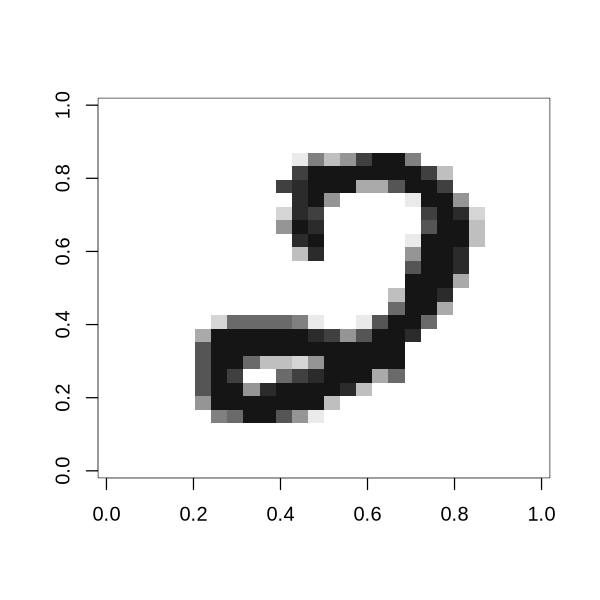

In [145]:
# Set the seed. Don't remove this!
set.seed(3500) 

options(repr.plot.height = 5, repr.plot.width = 5)
not_matching <- mnist_predictions_with_labels |>
filter(.pred_class == y)|>
slice_sample(n = 3)

not_matching_1 <- not_matching |>
slice(1) |>
select(seq) |>
pull()

not_matching_2 <- not_matching |>
slice(2) |>
select(seq) |>
pull()

not_matching_3 <- not_matching |>
slice(3) |>
select(seq) |>
pull()

 show_digit(slice(testing_data, not_matching_1))
 show_digit(slice(testing_data, not_matching_2))
 show_digit(slice(testing_data, not_matching_3))
# your code here
 # No Answer - remove if you provide an answer

In [146]:
library(digest)
stopifnot("type of exists('not_matching') is not logical"= setequal(digest(paste(toString(class(exists('not_matching'))), "b96fb")), "c3cd95f2cf3f342907862e4b8ac3beab"))
stopifnot("logical value of exists('not_matching') is not correct"= setequal(digest(paste(toString(exists('not_matching')), "b96fb")), "e70714b405b9c70778c60d50263f9336"))

stopifnot("type of dim(not_matching) is not integer"= setequal(digest(paste(toString(class(dim(not_matching))), "b96fc")), "eb1b8734df695ca803c6cc9012e414a8"))
stopifnot("length of dim(not_matching) is not correct"= setequal(digest(paste(toString(length(dim(not_matching))), "b96fc")), "83a7f76c43c4c7a0309ed43c41e3629c"))
stopifnot("values of dim(not_matching) are not correct"= setequal(digest(paste(toString(sort(dim(not_matching))), "b96fc")), "9e1b9493d6068a4fce8003b8ad816c95"))

stopifnot("type of exists('not_matching_1') is not logical"= setequal(digest(paste(toString(class(exists('not_matching_1'))), "b96fd")), "1af954b42ed7b7d48c76bc3972ad5ffb"))
stopifnot("logical value of exists('not_matching_1') is not correct"= setequal(digest(paste(toString(exists('not_matching_1')), "b96fd")), "8a8637f09f41fba525e52b660b3bfa99"))

stopifnot("type of exists('not_matching_2') is not logical"= setequal(digest(paste(toString(class(exists('not_matching_2'))), "b96fe")), "729590111ccc899171db372e32542ad1"))
stopifnot("logical value of exists('not_matching_2') is not correct"= setequal(digest(paste(toString(exists('not_matching_2')), "b96fe")), "b5e20bb9c86e30cb9edbfc0413e2b8b1"))

stopifnot("type of exists('not_matching_3') is not logical"= setequal(digest(paste(toString(class(exists('not_matching_3'))), "b96ff")), "78aa47e7b73b825aa3f7718194b95ea0"))
stopifnot("logical value of exists('not_matching_3') is not correct"= setequal(digest(paste(toString(exists('not_matching_3')), "b96ff")), "d4e807a49f8aba97a9d869697e813a77"))

# The rest of the tests are intentionally hidden so that you can practice deciding 
# when you have found the correct answer. 
print('Success!')

[1] "Success!"


**Question 4.4** True or False:
<br> {points: 1}

The above images were predicted incorrectly due to messy handwriting. For example, the second image is illegible and actually looks like the letter "U".

*Assign your answer to an object called `answer4.4`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [147]:
# Replace the fail() with your answer. 

# your code here
answer4.4<-"true" # No Answer - remove if you provide an answer

In [148]:
library(digest)
stopifnot("type of answer4.4 is not character"= setequal(digest(paste(toString(class(answer4.4)), "aa60a")), "57fdc1331bad23b01452fb17368e89d8"))
stopifnot("length of answer4.4 is not correct"= setequal(digest(paste(toString(length(answer4.4)), "aa60a")), "30267a18b7c8d0da4e9247beb23ebb52"))
stopifnot("value of answer4.4 is not correct"= setequal(digest(paste(toString(tolower(answer4.4)), "aa60a")), "58acdda436fb993793da167fd57346fe"))
stopifnot("letters in string value of answer4.4 are correct but case is not correct"= setequal(digest(paste(toString(answer4.4), "aa60a")), "58acdda436fb993793da167fd57346fe"))

print('Success!')

[1] "Success!"


**Question 4.5**
<br> {points: 3}

Looking again at the result from **Question 4.1**, what does this accuracy mean? Imagine that your classifier was to be used by the Canada Post to read handwritten digits in zip codes. Is it good enough that you would use this model for the Canada Post? Can you imagine a way we might improve our classifier's accuracy?

Results in 4.1 shows an okay accuracy, but it has little mistakes. It is not good enough for Canada Post because zip codes are such important information that no mistakes are allowed to be made. To improve the accuracy, we can train our classifier with more data, making the predictions closer and closer to the truth.

**Question 4.6**
<br> {points: 3}

Looking again at the result from **Question 4.1**, and let's think about the other two metrics introduced in class for evaluating classifier performance. Do you think it is a good idea to tune/build our classifier based on precision and/or recall?

It depends on the situation. Precision can be used to minimize the false positives while recall can be used to minimize false negatives.

In [149]:
source("cleanup.R")